## Python

In [1]:
N = int(10e6)

In [29]:
%%timeit

s = 0
for i in xrange(N):
    s+=i

1 loops, best of 3: 469 ms per loop


In [30]:
%%timeit
array = range(N)
s = 0
for i in array:
    s+=i

1 loops, best of 3: 422 ms per loop


## Pypy

In [4]:
%%time
%%capture
%%pypy
N = int(10e6)
s = 0
for j in xrange(1000):
    for i in xrange(N):
        s+=i

CPU times: user 4.03 ms, sys: 4.06 ms, total: 8.09 ms
Wall time: 13 s


### hence 13ms per loop

In [5]:
%%time
%%pypy
N = int(10e6)

array = range(N)

s = 0
for j in xrange(1000):
    for i in array:
        s+=i

pypy: /home/dmitry/anaconda/lib/libssl.so.1.0.0: no version information available (required by /home/dmitry/git/pypy-2.5.1-linux64/bin/libpypy-c.so)
pypy: /home/dmitry/anaconda/lib/libssl.so.1.0.0: no version information available (required by /home/dmitry/git/pypy-2.5.1-linux64/bin/libpypy-c.so)
pypy: /home/dmitry/anaconda/lib/libcrypto.so.1.0.0: no version information available (required by /home/dmitry/git/pypy-2.5.1-linux64/bin/libpypy-c.so)


CPU times: user 4.15 ms, sys: 4.21 ms, total: 8.36 ms
Wall time: 12.5 s


### hence 12.5ms per loop

## Numba

### Python

In [6]:
from numba.decorators import autojit

def loop(array):
    s = 0
    for i in array:
        s+=i

loop_numba = autojit(loop)

In [7]:
array = range(N)
loop_numba(array)

In [8]:
%%timeit
loop_numba(array)

1 loops, best of 3: 649 ms per loop


### NoPython

In [9]:
from numba.decorators import autojit

def loop():
    s = 0
    for i in xrange(N):
        s+=i

loop_numba = autojit(loop, nopython=True)

In [10]:
loop_numba()

In [11]:
%%timeit
loop_numba()

The slowest run took 24.22 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 78.7 ns per loop


In [12]:
from numba.decorators import autojit

def loop(array):
    s = 0
    for i in xrange(array.shape[0]):
        s+=array[i]

loop_numba = autojit(loop, nopython=True)

In [13]:
import numpy as np
array = np.arange(N)
loop_numba(array)

In [14]:
%%timeit
loop_numba(array)

The slowest run took 20.70 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 196 ns per loop


## Cython

#### 1

In [15]:
%load_ext Cython

In [16]:
%%cython

cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def loop_cython():
    cdef long s,N
    N = int(10e6)
    s = 0
    for i in xrange(N):
        s += i

In [17]:
%%timeit
loop_cython()

1 loops, best of 3: 251 ms per loop


#### 2

In [18]:
%%cython
cimport numpy as np
cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def loop_cython(np.ndarray[long, ndim=1] array):
    cdef long s
    s = 0
    for i in xrange(array.shape[0]):
        s += array[i]

In [19]:
%%timeit
loop_cython(array)

The slowest run took 47.18 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 278 ns per loop


#Numpy

In [20]:
import numpy as np
array = np.arange(N)

In [21]:
%%timeit
array.sum()

100 loops, best of 3: 5.52 ms per loop


#### Interesting

In [22]:
%%timeit
array.shape

The slowest run took 39.02 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 73.3 ns per loop


##Outline

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
plt.rcParams['figure.figsize'] = (16, 4)

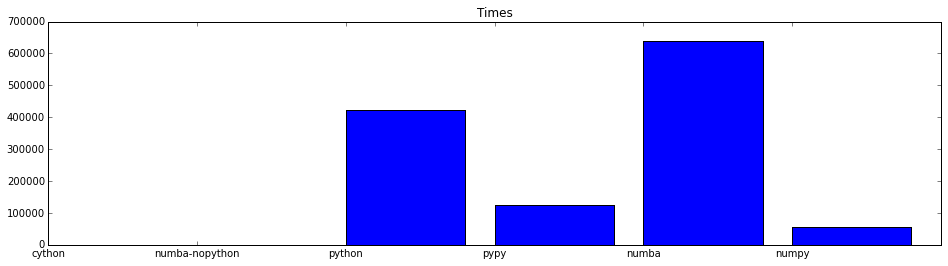

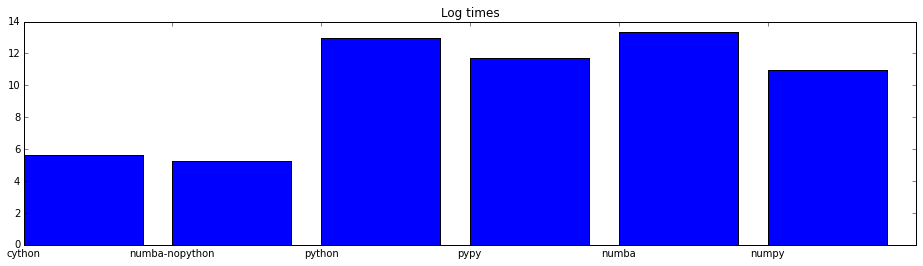

In [28]:
times = {
    'python' : 422000,
    'numba-nopython': 191,
    'numba':640000,
    'cython': 278,
    'numpy': 57000,
    'pypy': 125000
    }

plt.bar(np.arange(len(times)),times.values())
plt.xticks( np.arange(len(times)),times.keys())
plt.title('Times')
plt.show()

plt.bar(np.arange(len(times)),np.log(times.values()))
plt.xticks( np.arange(len(times)),times.keys())
plt.title('Log times')
plt.show()